# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

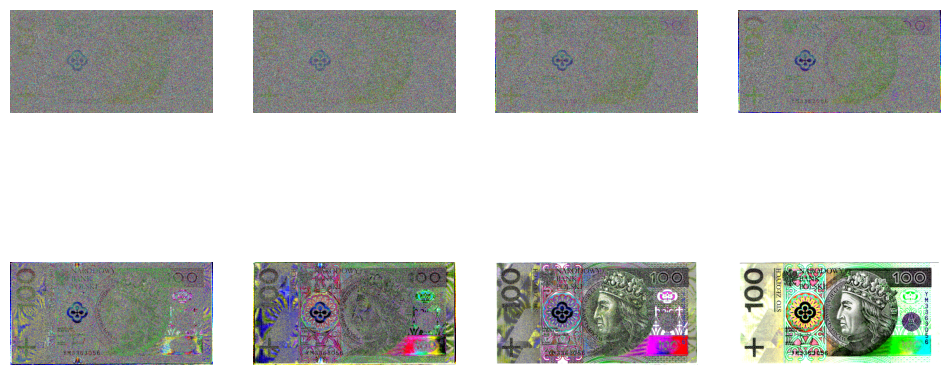

In [2]:
image = cv2.imread(fileName)

bit_planes = []

for i in range(8):
    bit_plane = (image >> i) & 1
    bit_plane *= 255
    bit_planes.append(bit_plane)

f, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(bit_planes[i], cmap='gray')
    ax.axis('off')

plt.show()

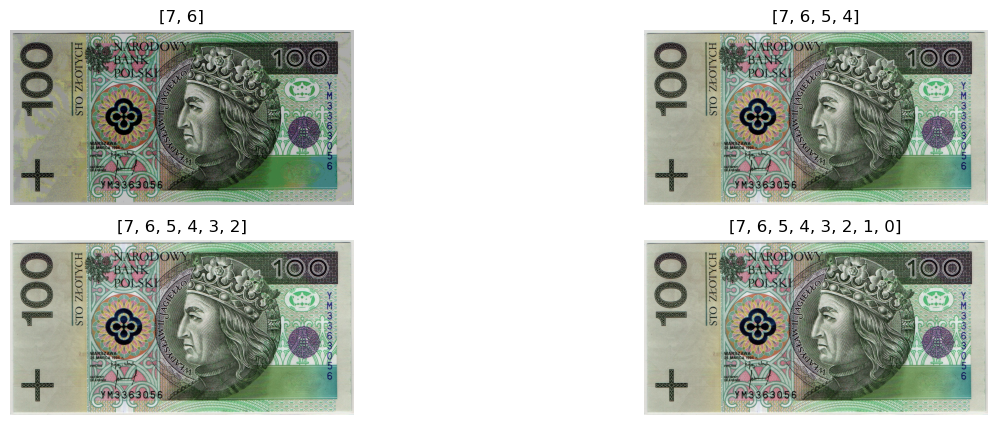

In [5]:
import numpy as np


def reconstruct_image(bit_planes, bits_to_use):
    reconstructed = np.zeros_like(bit_planes[0], dtype=np.uint8)

    for i in bits_to_use:
        reconstructed += (bit_planes[i] // 255) * (1 << i)

    return reconstructed


bit_sets = [[7, 6], [7, 6, 5, 4], [7, 6, 5, 4, 3, 2], [7, 6, 5, 4, 3, 2, 1, 0]]
reconstructed_images = []

for bit_set in bit_sets:
    reconstructed_images.append(reconstruct_image(bit_planes, bit_set))

f, axes = plt.subplots(2, 2, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(reconstructed_images[i], cmap='gray')
    ax.set_title(str(bit_sets[i]))
    ax.axis('off')
plt.show()